In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in the CSV and dropping the NaN values ###

In [2]:
###Read in data csv file and choose which columns we want to be included###
evict = pd.read_csv("data/Eviction_Notices.csv", engine='python', on_bad_lines='skip')
    
bad_reasons = evict[['Eviction ID', 'File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal']].dropna()
bad_reasons

,Eviction ID,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
0,M222138,12/12/2022,False,True,False,False,False,False,False,False
1,M211838,12/06/2021,False,True,False,False,False,False,False,False
2,M222033,11/14/2022,False,False,False,False,False,False,False,False
3,M221840,10/18/2022,False,False,False,False,False,False,False,False
4,M120930,06/21/2012,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
158041,M020356,03/25/2002,False,False,False,False,False,False,False,False
158042,M101330,09/24/2010,False,False,False,False,False,False,False,False
158043,M070731,04/25/2007,False,False,False,False,False,True,False,False
158044,M061330,08/09/2006,False,False,False,False,False,False,False,False


In [3]:
for col in evict.columns:
    print(col)

Eviction ID
Address
City
State
Eviction Notice Source Zipcode
File Date
Non Payment
Breach
Nuisance
Illegal Use
Failure to Sign Renewal
Access Denial
Unapproved Subtenant
Owner Move In
Demolition
Capital Improvement
Substantial Rehab
Ellis Act WithDrawal
Condo Conversion
Roommate Same Unit
Other Cause
Late Payments
Lead Remediation
Development
Good Samaritan Ends
Constraints Date
Supervisor District
Neighborhoods - Analysis Boundaries
Location
Shape
SF Find Neighborhoods
Current Police Districts
Current Supervisor Districts
Analysis Neighborhoods
DELETE - Neighborhoods
DELETE - Police Districts
DELETE - Supervisor Districts
DELETE - Fire Prevention Districts
DELETE - Zip Codes
CBD, BID and GBD Boundaries as of 2017
Central Market/Tenderloin Boundary
Areas of Vulnerability, 2016
Central Market/Tenderloin Boundary Polygon - Updated
Fix It Zones as of 2018-02-07
Neighborhoods


In [4]:
###same as last cell, just include which neighborhoods they were in. however, some neighborhoods were NaN so we dropped those values and got a different graph###

bad_reasons_with_neighborhood = evict[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal', 'Neighborhoods - Analysis Boundaries']].dropna()

sampled = bad_reasons_with_neighborhood.sample(5000).rename({'Neighborhoods - Analysis Boundaries': 'Neighborhoods'}, axis=1)
sampled.head(20)

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal,Neighborhoods
98349,M162215,1600 Block Of Golden Gate Avenue,07/05/2016,False,False,False,False,False,False,True,False,Western Addition
11304,M140530,300 Block Of Serrano Drive,03/10/2014,False,False,False,False,False,False,False,False,Lakeshore
139435,M172110,600 Block Of London Street,08/21/2017,True,False,False,False,False,False,False,False,Excelsior
85419,E990044,0 Block Of Crestline Drive,01/07/1999,True,False,False,False,False,False,False,False,Twin Peaks
72475,M041730,800 Block Of Sacramento Street,09/20/2004,True,False,False,False,False,False,False,False,Chinatown
86279,E981978,900 Block Of South Van Ness Avenue,08/28/1998,False,False,False,False,False,False,False,False,Mission
40140,E980954,300 Block Of 18th Street,05/06/1998,False,False,False,False,False,False,False,False,Outer Richmond
45484,M170657,4900 Block Of 17th Street,03/20/2017,False,False,False,False,False,True,False,False,Haight Ashbury
59795,M151216,700 Block Of France Avenue,05/15/2015,False,False,False,False,True,False,False,False,Excelsior
123897,M100791,1700 Block Of 09th Avenue,06/24/2010,False,False,False,False,False,False,False,False,Inner Sunset


In [5]:
neighborhood_counts = sampled[['Neighborhoods']].value_counts().reset_index(name='counts')
neighborhood_counts.describe()

,counts
count,41.000000
mean,121.951220
std,105.548082
min,1.000000
25%,49.000000
50%,117.000000
75%,151.000000
max,517.000000


<AxesSubplot: xlabel='Neighborhoods'>

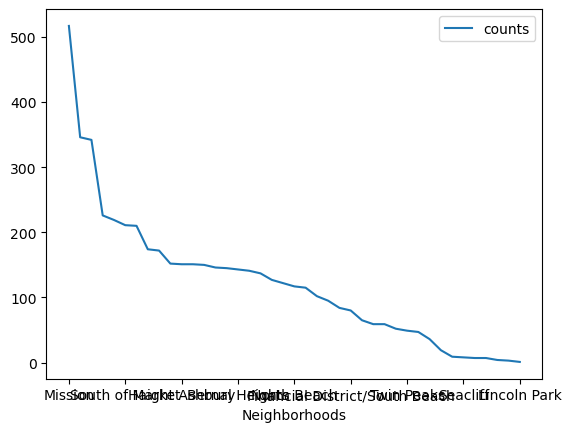

In [6]:
###plot evictions per neighborhood###
neighborhood_counts.plot('Neighborhoods', 'counts')

<BarContainer object of 41 artists>

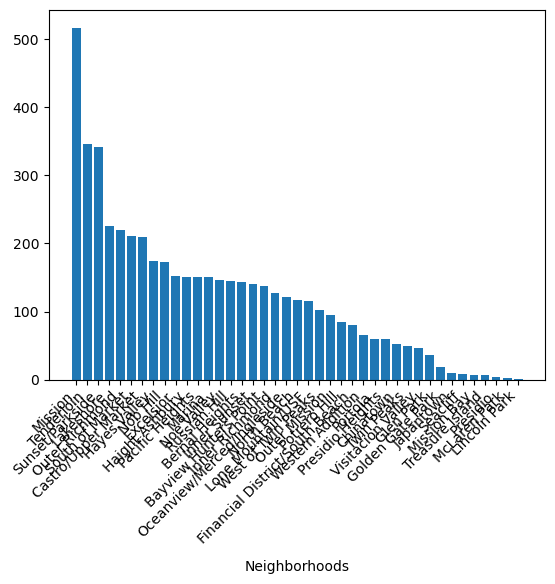

In [7]:
neighs = list(neighborhood_counts["Neighborhoods"])
counts = list(neighborhood_counts["counts"])
fig, ax = plt.subplots()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Neighborhoods", labelpad = 10)
plt.bar(neighs, counts)


In [8]:
nuisances = sampled[['Nuisance']]

In [9]:
reasons = sampled.iloc[:, 3:11]
reasons

,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
98349,False,False,False,False,False,False,True,False
11304,False,False,False,False,False,False,False,False
139435,True,False,False,False,False,False,False,False
85419,True,False,False,False,False,False,False,False
72475,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
77148,False,True,False,False,False,False,False,False
9949,False,False,False,False,False,False,False,False
43188,False,False,False,False,False,False,False,False
37650,False,False,False,False,False,False,False,False


   Non Payment  counts
0        False    4673
1         True     327
   Nuisance  counts
0     False    4069
1      True     931
   Illegal Use  counts
0        False    4892
1         True     108
   Unapproved Subtenant  counts
0                 False    4890
1                  True     110
   Demolition  counts
0       False    4858
1        True     142
   Ellis Act WithDrawal  counts
0                 False    4500
1                  True     500
   Late Payments  counts
0          False    4815
1           True     185
   Failure to Sign Renewal  counts
0                    False    4989
1                     True      11
11


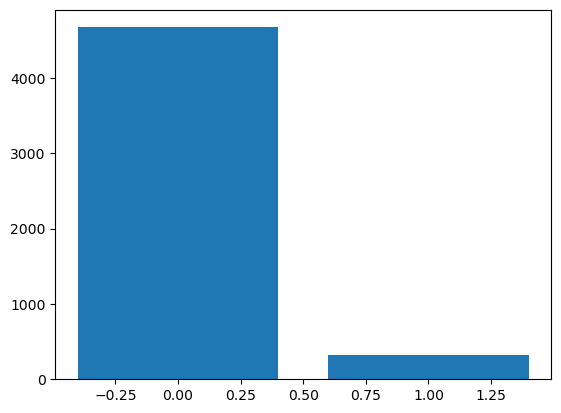

In [10]:
for col in reasons.columns:
    print(sampled[[col]].value_counts().reset_index(name='counts'))

###plot true and false for one column###
payment_ocurr = reasons[['Non Payment']].value_counts().reset_index(name='counts')
payment_ocurr

pay_bool = list(payment_ocurr['Non Payment'])
pay_counts = list(payment_ocurr['counts'])
plt.bar(pay_bool, pay_counts)

#create dataframe with true and false occurrences, maybe make this one of the tests#
columnNames = reasons.columns

for i in reasons.columns:
    true_occurrences = reasons[i].sum()
    false_occurrences = len(reasons) - true_occurrences

data = {"True": true_occurrences, "False": false_occurrences}
combined = pd.DataFrame(data, columnNames)
print(true_occurrences)

In [11]:
###another method to find number of true and false occurrences per reason###
columnNames = reasons.columns
trues_oc = {}

for i in reasons.columns:
    trues_oc[i] = reasons[i].sum()

print(trues_oc)

argh = pd.DataFrame(trues_oc, ['True'], columnNames).reset_index()
print(argh)

{'Non Payment': 327, 'Nuisance': 931, 'Illegal Use': 108, 'Unapproved Subtenant': 110, 'Demolition': 142, 'Ellis Act WithDrawal': 500, 'Late Payments': 185, 'Failure to Sign Renewal': 11}
  index  Non Payment  Nuisance  Illegal Use  Unapproved Subtenant  Demolition  \
0  True          327       931          108                   110         142   

   Ellis Act WithDrawal  Late Payments  Failure to Sign Renewal  
0                   500            185                       11  


In [12]:
argh_columns = [col for col in argh.columns]
print(argh_columns)

['index', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal']


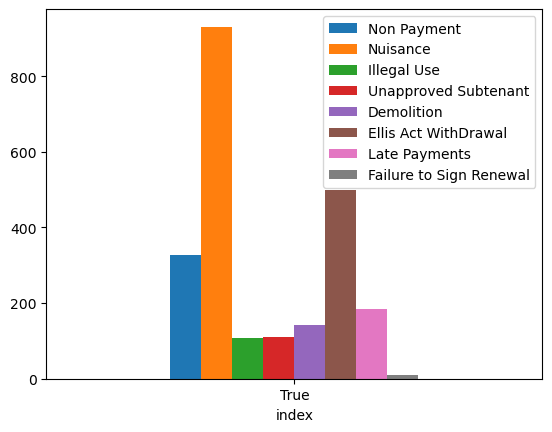

In [16]:
ax = argh.plot(x="index", y=argh_columns[1:], kind="bar", rot=0)
plt.legend(loc='best')